In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.stats import norm
from non_gaussian_converter import GaussianTransformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Example 1: Gaussian Mixture 1

In [41]:
# generate test data
x = np.hstack((norm().rvs(1000),norm(3).rvs(1000),norm(-5).rvs(1000)))
# to gaussian
x_tf = GaussianTransformer().fit_transform(x)

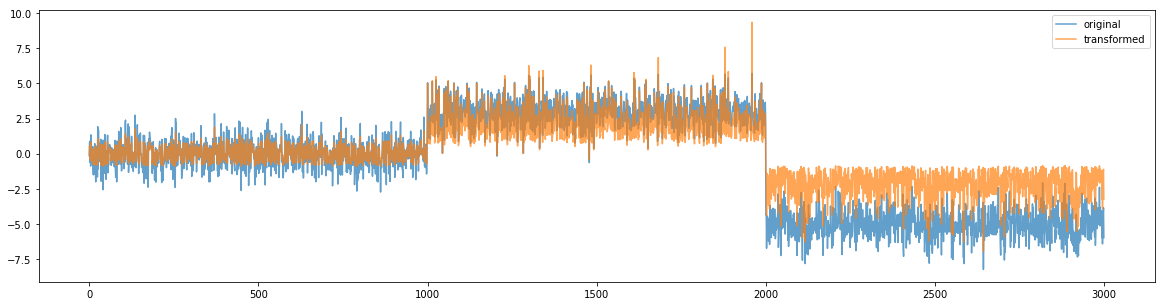

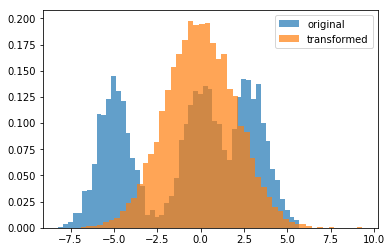

In [42]:
plt.figure(figsize=(20,5))
plt.plot(x,alpha=0.7,label="original")
plt.plot(x_tf,alpha=0.7,label="transformed")
plt.legend()

plt.figure()
plt.hist(x,bins=50,alpha=0.7,label="original",density=True)
plt.hist(x_tf,bins=50,alpha=0.7,label="transformed",density=True)
plt.legend()

## Example 2: Log-normal

In [43]:
# generate test data
x = np.exp(norm().rvs(1000))
# to gaussian
x_tf = GaussianTransformer().fit_transform(x)

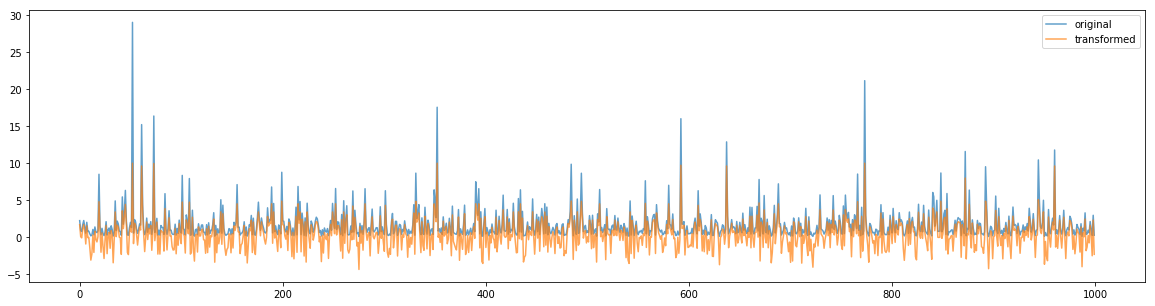

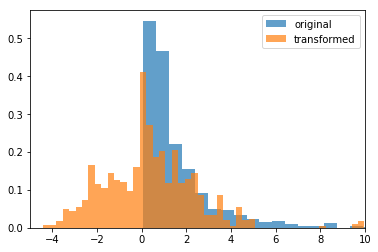

In [44]:
plt.figure(figsize=(20,5))
plt.plot(x,alpha=0.7,label="original")
plt.plot(x_tf,alpha=0.7,label="transformed")
plt.legend()

plt.figure()
plt.hist(x,bins=50,alpha=0.7,label="original",density=True)
plt.hist(x_tf,bins=50,alpha=0.7,label="transformed",density=True)
plt.xlim(-5,10)
plt.legend()

In [45]:
# generate test data
x = np.hstack((norm(0,0.1).rvs(1000),norm(3,0.1).rvs(1000),norm(-5,0.1).rvs(1000)))
# to gaussian
x_tf = GaussianTransformer().fit_transform(x)

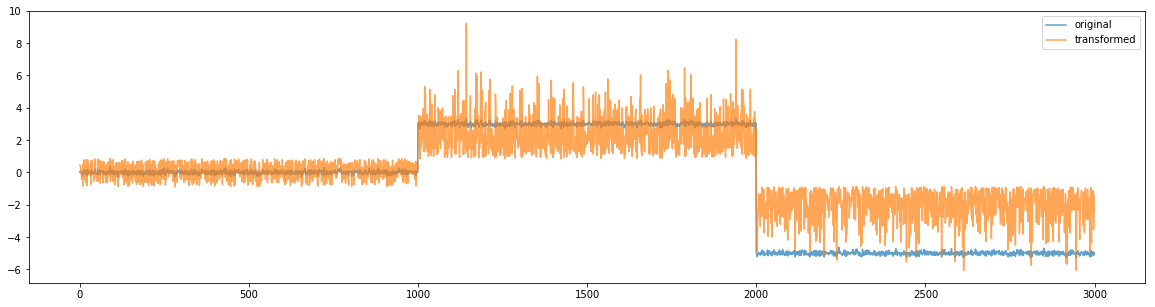

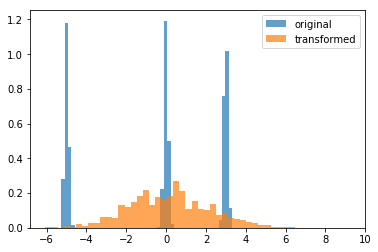

In [46]:
plt.figure(figsize=(20,5))
plt.plot(x,alpha=0.7,label="original")
plt.plot(x_tf,alpha=0.7,label="transformed")
plt.legend()

plt.figure()
plt.hist(x,bins=50,alpha=0.7,label="original",density=True)
plt.hist(x_tf,bins=50,alpha=0.7,label="transformed",density=True)
plt.legend()

In [47]:
gt = GaussianTransformer().fit(x)

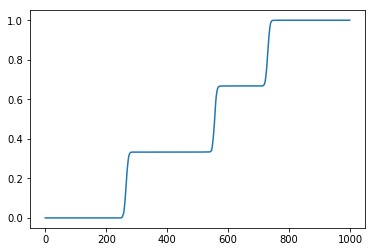

In [48]:
plt.plot(gt.target_cdfs[0])

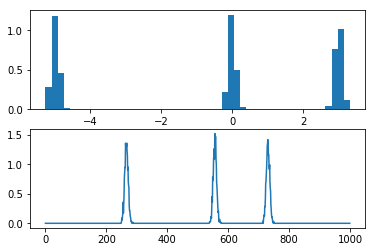

In [49]:
from statsmodels.nonparametric.kde import KDEUnivariate
kde = KDEUnivariate(x)
kde.fit()
kde.fit(bw=kde.bw*0.01)
xmin = x.min(); xmax = x.max()
xrange = xmax - xmin
pdf = kde.evaluate(np.linspace(xmin-xrange/2,xmax+xrange/2,gt.resolution))

f,ax = plt.subplots(2)
ax[0].hist(x,bins=50,density=True)
ax[1].plot(pdf)

In [31]:
kde.bw

0.70566263830742304